In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score



2-1

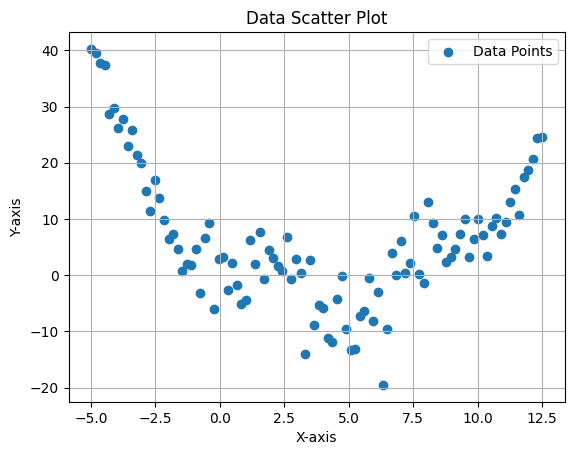

In [2]:
y = np.load("data.npy")
x = np.linspace(-5,12.5,100)
data = pd.DataFrame({'X': x, 'Y': y})
plt.scatter(x, y, label='Data Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Data Scatter Plot')
plt.legend()
plt.grid()
plt.show()

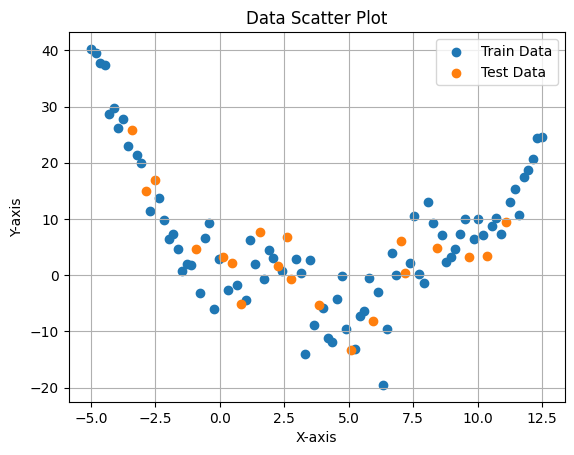

In [3]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=13,test_size=0.2)
plt.scatter(x_train, y_train, label='Train Data')
plt.scatter(x_test, y_test, label='Test Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Data Scatter Plot')
plt.legend()
plt.grid()
plt.show()

In [4]:
class LinearRegression:
    def __init__(self):
        self.weights = None  # Weights of the model
        self.bias = 0        # Bias term
        self.loss_history = []  # To store loss values for visualization
        self.train_mse_list = []  # List to store train MSE values
        self.test_mse_list = []   # List to store test MSE values
        # Initialize metric lists
        self.mse_list = []
        self.rmse_list = []
        self.mae_list = []
        self.r2_list = []
        self.exvar_list = []

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def gradient_descent(self, X, y, y_pred, learning_rate):
        n_samples = X.shape[0]
        dw = -(2 / n_samples) * np.dot(X.T, (y - y_pred))
        db = -(2 / n_samples) * np.sum(y - y_pred)
        self.weights -= learning_rate * dw
        self.bias -= learning_rate * db

    def train(self, X_train, y_train, X_test, y_test, epochs=1000, learning_rate=0.001):
        n_features = X_train.shape[1]
        self.weights = np.zeros(n_features)  # Initialize weights with correct dimensions

        for epoch in range(epochs):
            # Training predictions
            y_train_pred = self.predict(X_train)
            self.gradient_descent(X_train, y_train, y_train_pred, learning_rate)
            
            # Training metrics
            mse_train = np.mean((y_train - y_train_pred) ** 2)
            rmse_train = np.sqrt(mse_train)
            mae_train = np.mean(np.abs(y_train - y_train_pred))
            r2_train = r2_score(y_train, y_train_pred)
            exvar_train = explained_variance_score(y_train, y_train_pred)

            # Test predictions
            y_test_pred = self.predict(X_test)
            mse_test = np.mean((y_test - y_test_pred) ** 2)

            # Append metrics to their respective lists
            self.mse_list.append(mse_train)
            self.rmse_list.append(rmse_train)
            self.mae_list.append(mae_train)
            self.r2_list.append(r2_train)
            self.exvar_list.append(exvar_train)

            # Append train and test MSE
            self.train_mse_list.append(mse_train)
            self.test_mse_list.append(mse_test)

            # Record loss history
            self.loss_history.append(mse_train)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Train MSE = {mse_train:.4f}, Test MSE = {mse_test:.4f}, RMSE = {rmse_train:.4f}, MAE = {mae_train:.4f}, R^2 = {r2_train:.4f}, Explained Variance = {exvar_train:.4f}")
            if epoch == epochs-1:
                print(f"\n____________________________________________\nTrianning Done! (Epoch {epoch}):\n")
                print(f"Train MSE = {mse_train:.4f}\nTest MSE = {mse_test:.4f}\nRMSE = {rmse_train:.4f}\nMAE = {mae_train:.4f}\nR^2 = {r2_train:.4f}\nExplained Variance = {exvar_train:.4f}")
                print("____________________________________________\n")


    def plot_training(self):
        plt.figure(figsize=(8, 5))
        plt.plot(self.loss_history, label="Train Loss (MSE)", color="blue")
        plt.title("Training Loss (MSE) Over Epochs")
        plt.xlabel("Epochs")
        plt.ylabel("MSE")
        plt.legend()
        plt.grid(True)
        plt.show()

    def plot_metrics(self):
        # Plotting the metrics
        plt.figure(figsize=(14, 10))

        # Mean Squared Error
        plt.subplot(2, 3, 1)
        plt.plot(self.mse_list, label='Train MSE', color='blue')
        plt.plot(self.test_mse_list, label='Test MSE', color='red')
        plt.title('Mean Squared Error')
        plt.xlabel('Epochs')
        plt.ylabel('Mean Squared Error')
        plt.legend()
        plt.grid()

        # Root Mean Squared Error
        plt.subplot(2, 3, 2)
        plt.plot(self.rmse_list, label='RMSE', color='green')
        plt.title('Root Mean Squared Error')
        plt.xlabel('Epochs')
        plt.ylabel('Root Mean Squared Error')
        plt.grid()
        plt.legend()

        # Mean Absolute Error
        plt.subplot(2, 3, 3)
        plt.plot(self.mae_list, label='MAE', color='orange')
        plt.title('Mean Absolute Error')
        plt.xlabel('Epochs')
        plt.ylabel('Mean Absolute Error')
        plt.grid()
        plt.legend()

        # R^2 Score
        plt.subplot(2, 3, 4)
        plt.plot(self.r2_list, label='R^2', color='purple')
        plt.title('R^2 Score')
        plt.xlabel('Epochs')
        plt.ylabel('R^2 Score')
        plt.ylim(-1, 1)  # Set limits for R^2
        plt.grid()
        plt.legend()

        # Explained Variance Score
        plt.subplot(2, 3, 5)
        plt.plot(self.exvar_list, label='Explained Variance', color='red')
        plt.title('Explained Variance Score')
        plt.xlabel('Epochs')
        plt.ylabel('Explained Variance Score')
        plt.ylim(-1, 1)  # Set limits for Explained Variance
        plt.grid()
        plt.legend()

        plt.tight_layout()
        plt.show()



(80, 1)
Epoch 0: Train MSE = 208.4650, Test MSE = 90.4010, RMSE = 14.4383, MAE = 10.5574, R^2 = -0.2974, Explained Variance = 0.0000
Epoch 100: Train MSE = 154.2948, Test MSE = 67.5828, RMSE = 12.4215, MAE = 9.6844, R^2 = 0.0397, Explained Variance = 0.0561
Epoch 200: Train MSE = 150.5128, Test MSE = 70.7563, RMSE = 12.2684, MAE = 9.9185, R^2 = 0.0633, Explained Variance = 0.0645
Epoch 300: Train MSE = 150.2369, Test MSE = 72.3049, RMSE = 12.2571, MAE = 9.9957, R^2 = 0.0650, Explained Variance = 0.0651
Epoch 400: Train MSE = 150.2168, Test MSE = 72.7735, RMSE = 12.2563, MAE = 10.0202, R^2 = 0.0651, Explained Variance = 0.0651
Epoch 500: Train MSE = 150.2153, Test MSE = 72.9038, RMSE = 12.2562, MAE = 10.0268, R^2 = 0.0651, Explained Variance = 0.0651
Epoch 600: Train MSE = 150.2152, Test MSE = 72.9392, RMSE = 12.2562, MAE = 10.0286, R^2 = 0.0651, Explained Variance = 0.0651
Epoch 700: Train MSE = 150.2152, Test MSE = 72.9488, RMSE = 12.2562, MAE = 10.0291, R^2 = 0.0651, Explained Varian

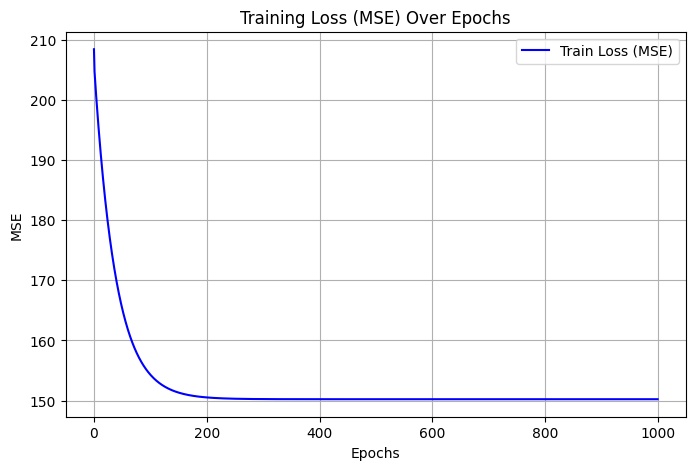

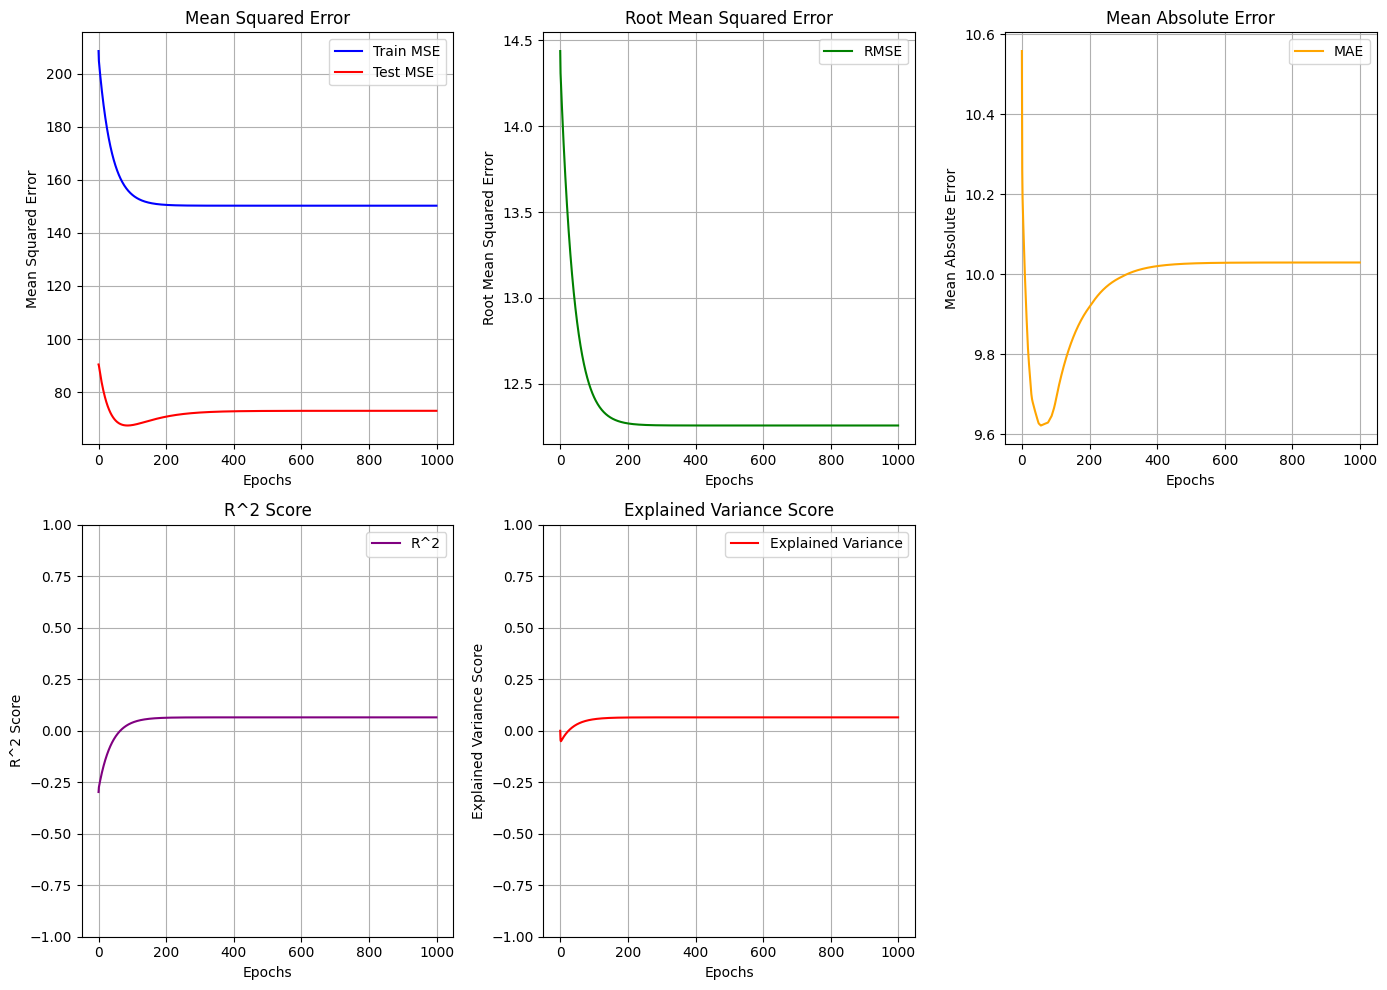

In [228]:
x_train = x_train.reshape(-1, 1)  
x_test = x_test.reshape(-1, 1)
print(x_train.shape)   
model = LinearRegression()
model.train(x_train, y_train, x_test, y_test, epochs=1000, learning_rate=0.01)
model.plot_training()
model.plot_metrics()

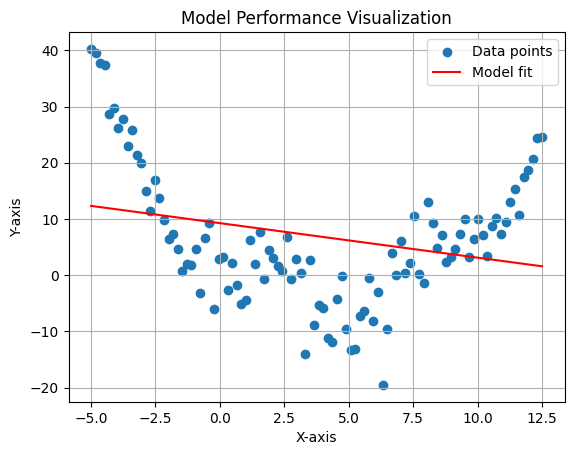

In [229]:
x_line = np.linspace(-5,12.5, 100).reshape(-1,1)
y_line = model.predict(x_line)
plt.scatter(x, y, label='Data points')
plt.plot(x_line, y_line, color='red', label='Model fit')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Model Performance Visualization')
plt.legend()
plt.grid()
plt.show()


In [230]:
scaler = StandardScaler()
x_2d = scaler.fit_transform(np.column_stack((x , x**2)))
x_train,x_test,y_train,y_test=train_test_split(x_2d,y,random_state=13,test_size=0.2)

Epoch 0: Train MSE = 208.4650, Test MSE = 88.3209, RMSE = 14.4383, MAE = 10.5574, R^2 = -0.2974, Explained Variance = 0.0000
Epoch 100: Train MSE = 98.8057, Test MSE = 48.0951, RMSE = 9.9401, MAE = 7.3497, R^2 = 0.3851, Explained Variance = 0.3894
Epoch 200: Train MSE = 65.5294, Test MSE = 35.6153, RMSE = 8.0950, MAE = 6.0916, R^2 = 0.5922, Explained Variance = 0.5922
Epoch 300: Train MSE = 48.2275, Test MSE = 29.2281, RMSE = 6.9446, MAE = 5.3414, R^2 = 0.6999, Explained Variance = 0.6999
Epoch 400: Train MSE = 39.0081, Test MSE = 26.6624, RMSE = 6.2456, MAE = 4.9252, R^2 = 0.7572, Explained Variance = 0.7572
Epoch 500: Train MSE = 34.0914, Test MSE = 25.9827, RMSE = 5.8388, MAE = 4.6512, R^2 = 0.7878, Explained Variance = 0.7878
Epoch 600: Train MSE = 31.4693, Test MSE = 26.1293, RMSE = 5.6098, MAE = 4.4619, R^2 = 0.8042, Explained Variance = 0.8042
Epoch 700: Train MSE = 30.0710, Test MSE = 26.5797, RMSE = 5.4837, MAE = 4.3692, R^2 = 0.8129, Explained Variance = 0.8129
Epoch 800: Tra

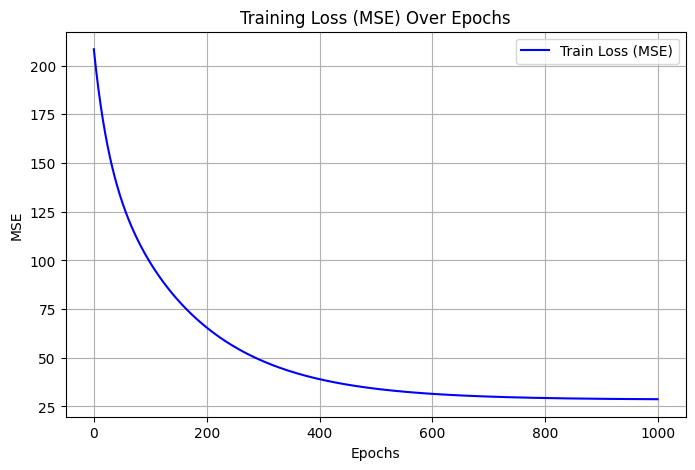

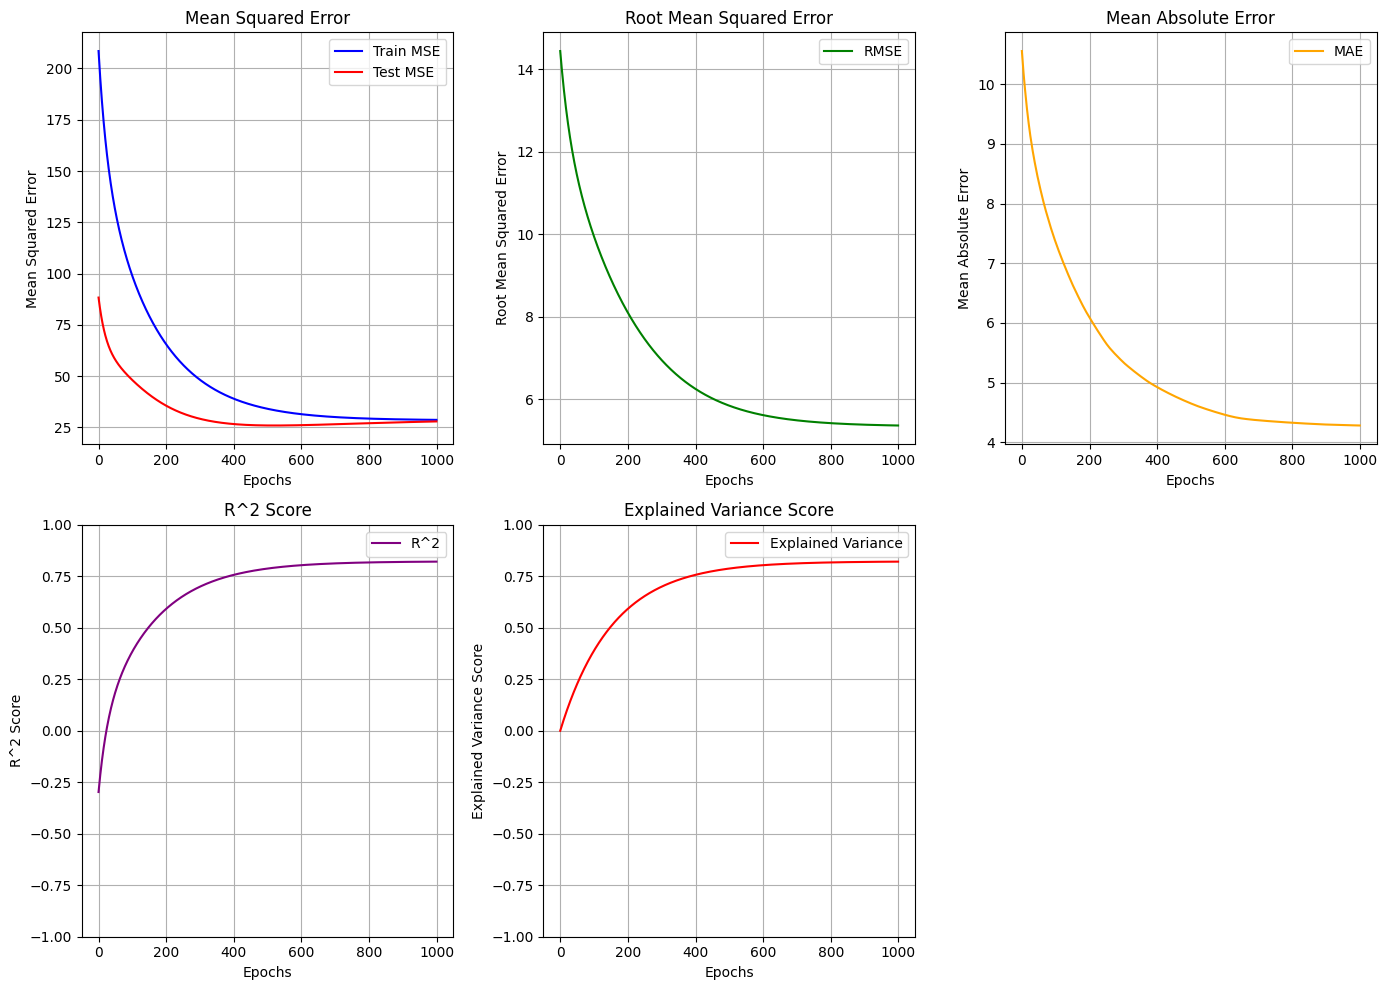

In [231]:
model = LinearRegression()
model.train(x_train, y_train,x_test,y_test, epochs=1000, learning_rate=0.01)
model.plot_training()
model.plot_metrics()

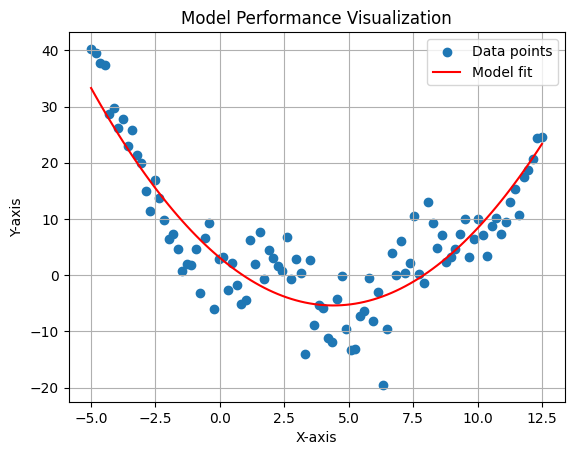

In [232]:

x_line = np.linspace(-5,12.5, 100).reshape(-1,1)
x_line_2d = scaler.fit_transform(np.column_stack((x_line , x_line**2)))
y_line = model.predict(x_line_2d)
plt.scatter(x, y, label='Data points')
plt.plot(x_line, y_line, color='red', label='Model fit')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Model Performance Visualization')
plt.legend()
plt.grid()
plt.show()

Epoch 0: Train MSE = 208.4650, Test MSE = 88.3983, RMSE = 14.4383, MAE = 10.5574, R^2 = -0.2974, Explained Variance = 0.0000
Epoch 100: Train MSE = 92.0896, Test MSE = 44.8260, RMSE = 9.5963, MAE = 6.9383, R^2 = 0.4269, Explained Variance = 0.4311
Epoch 200: Train MSE = 61.1542, Test MSE = 32.6937, RMSE = 7.8201, MAE = 5.7804, R^2 = 0.6194, Explained Variance = 0.6194
Epoch 300: Train MSE = 47.2817, Test MSE = 27.7228, RMSE = 6.8762, MAE = 5.2256, R^2 = 0.7057, Explained Variance = 0.7057
Epoch 400: Train MSE = 40.6496, Test MSE = 26.1725, RMSE = 6.3757, MAE = 4.9190, R^2 = 0.7470, Explained Variance = 0.7470
Epoch 500: Train MSE = 37.2566, Test MSE = 25.9581, RMSE = 6.1038, MAE = 4.7837, R^2 = 0.7681, Explained Variance = 0.7681
Epoch 600: Train MSE = 35.3340, Test MSE = 26.1783, RMSE = 5.9442, MAE = 4.7068, R^2 = 0.7801, Explained Variance = 0.7801
Epoch 700: Train MSE = 34.0961, Test MSE = 26.4871, RMSE = 5.8392, MAE = 4.6460, R^2 = 0.7878, Explained Variance = 0.7878
Epoch 800: Tra

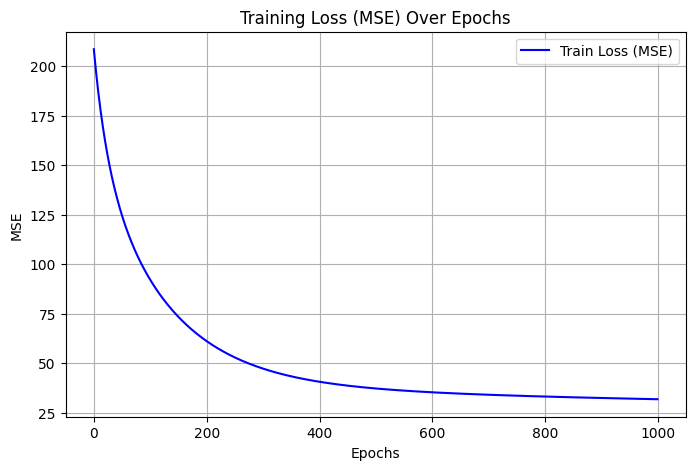

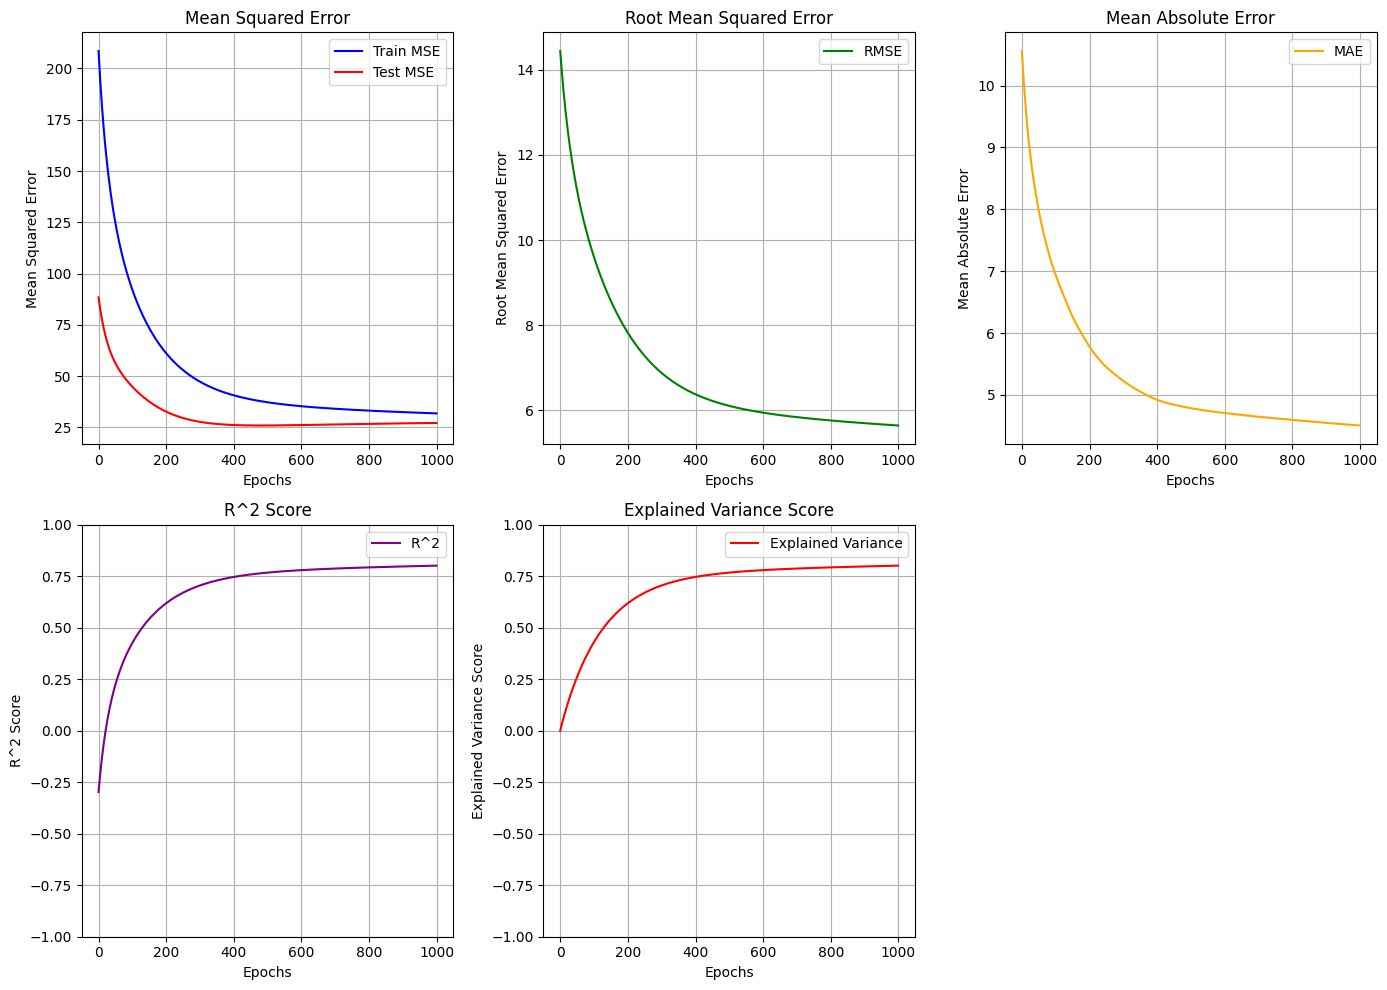

In [233]:
x_3d = scaler.fit_transform(np.column_stack((x , x**2,x**3)))
x_train,x_test,y_train,y_test=train_test_split(x_3d,y,random_state=13,test_size=0.2)
model = LinearRegression()
model.train(x_train, y_train,x_test,y_test, epochs=1000, learning_rate=0.01)
model.plot_training()
model.plot_metrics()

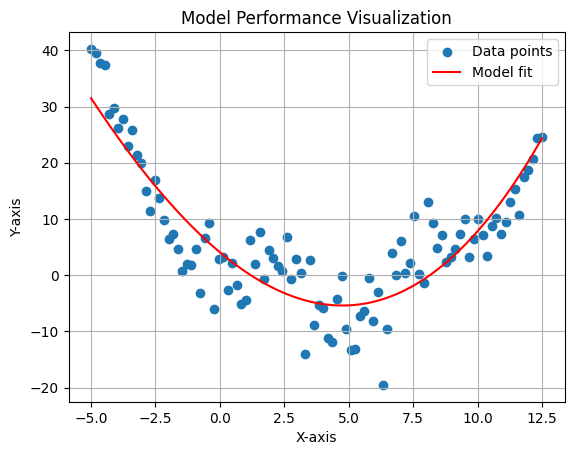

In [234]:
x_line = np.linspace(-5,12.5, 100).reshape(-1,1)
x_line_3d = scaler.fit_transform(np.column_stack((x_line , x_line**2,x_line**3)))
y_line = model.predict(x_line_3d)
plt.scatter(x, y, label='Data points')
plt.plot(x_line, y_line, color='red', label='Model fit')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Model Performance Visualization')
plt.legend()
plt.grid()
plt.show()

Epoch 0: Train MSE = 208.4650, Test MSE = 88.4692, RMSE = 14.4383, MAE = 10.5574, R^2 = -0.2974, Explained Variance = 0.0000
Epoch 100: Train MSE = 83.6612, Test MSE = 41.3668, RMSE = 9.1466, MAE = 6.5083, R^2 = 0.4793, Explained Variance = 0.4835
Epoch 200: Train MSE = 57.5233, Test MSE = 31.0928, RMSE = 7.5844, MAE = 5.5490, R^2 = 0.6420, Explained Variance = 0.6420
Epoch 300: Train MSE = 47.7081, Test MSE = 27.7938, RMSE = 6.9071, MAE = 5.2732, R^2 = 0.7031, Explained Variance = 0.7031
Epoch 400: Train MSE = 43.1041, Test MSE = 26.8123, RMSE = 6.5654, MAE = 5.1540, R^2 = 0.7317, Explained Variance = 0.7317
Epoch 500: Train MSE = 40.3530, Test MSE = 26.4981, RMSE = 6.3524, MAE = 5.0561, R^2 = 0.7489, Explained Variance = 0.7489
Epoch 600: Train MSE = 38.3541, Test MSE = 26.3607, RMSE = 6.1931, MAE = 4.9574, R^2 = 0.7613, Explained Variance = 0.7613
Epoch 700: Train MSE = 36.7334, Test MSE = 26.2785, RMSE = 6.0608, MAE = 4.8621, R^2 = 0.7714, Explained Variance = 0.7714
Epoch 800: Tra

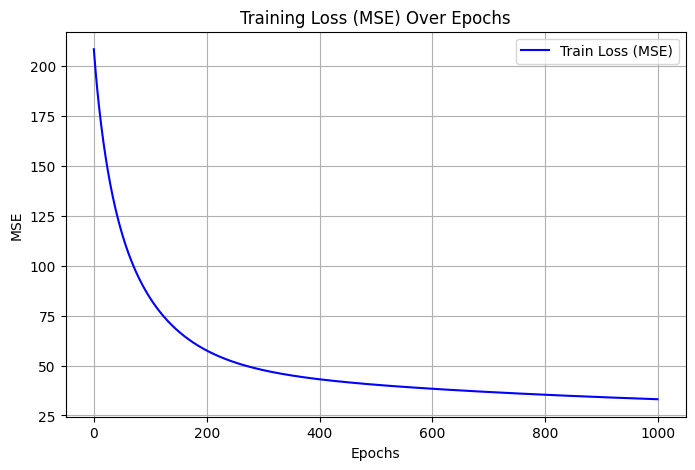

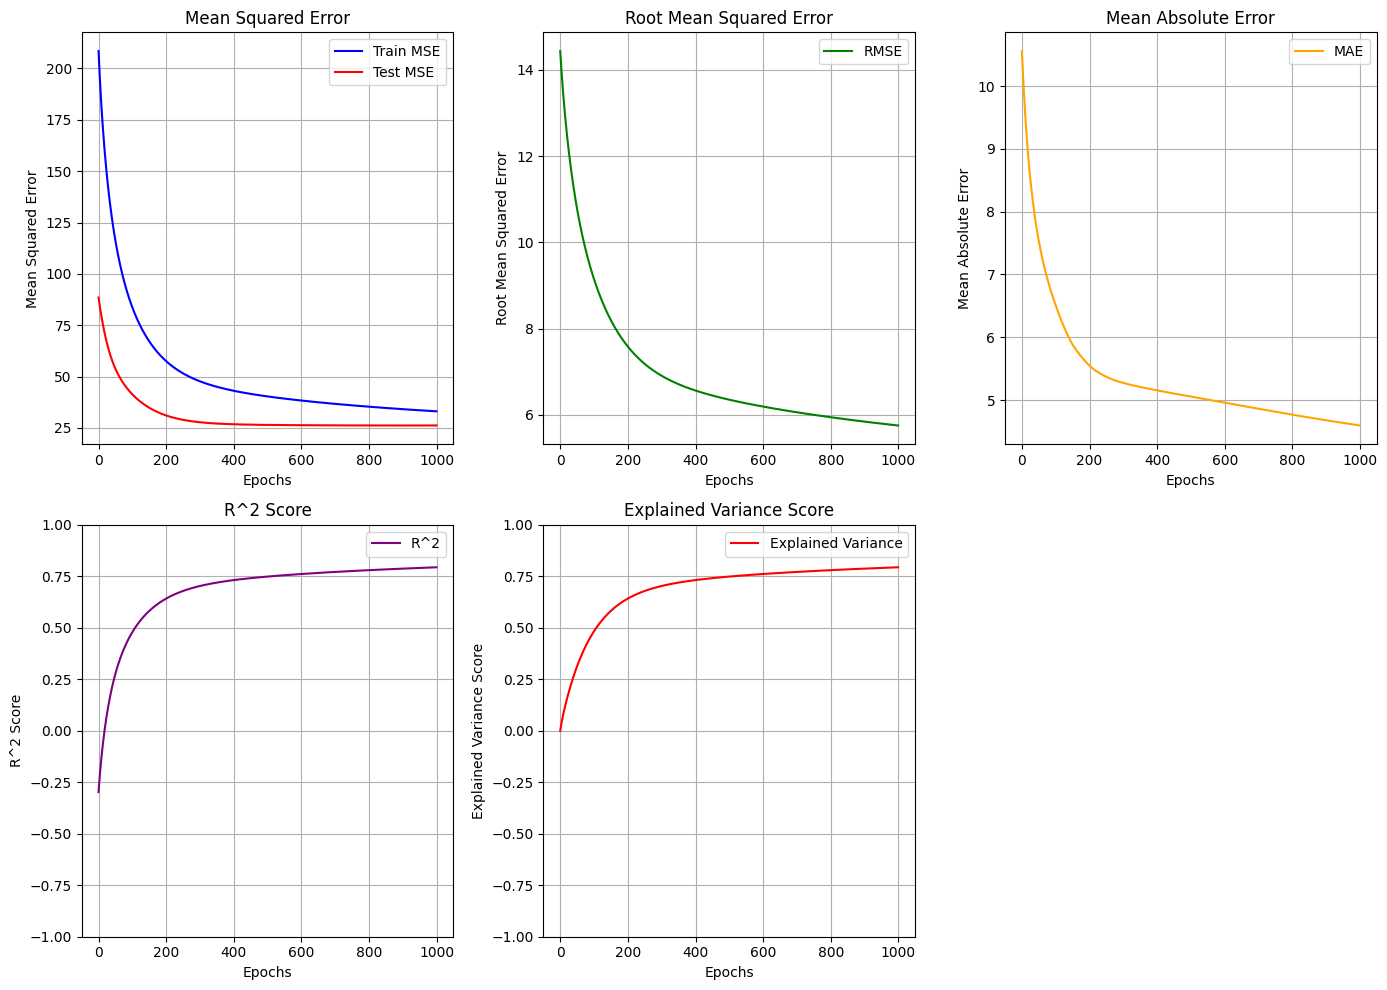

In [235]:
x_4d = scaler.fit_transform(np.column_stack((x , x**2,x**3,x**4)))
x_train,x_test,y_train,y_test=train_test_split(x_4d,y,random_state=13,test_size=0.2)
model = LinearRegression()
model.train(x_train, y_train,x_test,y_test, epochs=1000, learning_rate=0.01)
model.plot_training()
model.plot_metrics()

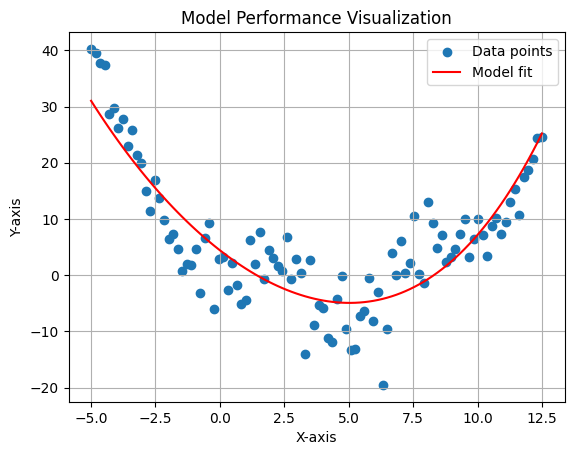

In [236]:
x_line = np.linspace(-5,12.5, 100).reshape(-1,1)
x_line_4d = scaler.fit_transform(np.column_stack((x_line , x_line**2,x_line**3,x_line**4)))
y_line = model.predict(x_line_4d)
plt.scatter(x, y, label='Data points')
plt.plot(x_line, y_line, color='red', label='Model fit')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Model Performance Visualization')
plt.legend()
plt.grid()
plt.show()

Epoch 0: Train MSE = 208.4650, Test MSE = 88.5370, RMSE = 14.4383, MAE = 10.5574, R^2 = -0.2974, Explained Variance = 0.0000
Epoch 100: Train MSE = 81.5806, Test MSE = 40.0547, RMSE = 9.0322, MAE = 6.3742, R^2 = 0.4923, Explained Variance = 0.4964
Epoch 200: Train MSE = 59.0409, Test MSE = 31.3234, RMSE = 7.6838, MAE = 5.6888, R^2 = 0.6326, Explained Variance = 0.6326
Epoch 300: Train MSE = 50.3302, Test MSE = 28.4411, RMSE = 7.0944, MAE = 5.4619, R^2 = 0.6868, Explained Variance = 0.6868
Epoch 400: Train MSE = 45.3825, Test MSE = 27.2007, RMSE = 6.7367, MAE = 5.3001, R^2 = 0.7176, Explained Variance = 0.7176
Epoch 500: Train MSE = 41.8461, Test MSE = 26.5117, RMSE = 6.4689, MAE = 5.1275, R^2 = 0.7396, Explained Variance = 0.7396
Epoch 600: Train MSE = 39.0666, Test MSE = 26.1009, RMSE = 6.2503, MAE = 4.9725, R^2 = 0.7569, Explained Variance = 0.7569
Epoch 700: Train MSE = 36.8113, Test MSE = 25.8858, RMSE = 6.0672, MAE = 4.8283, R^2 = 0.7709, Explained Variance = 0.7709
Epoch 800: Tra

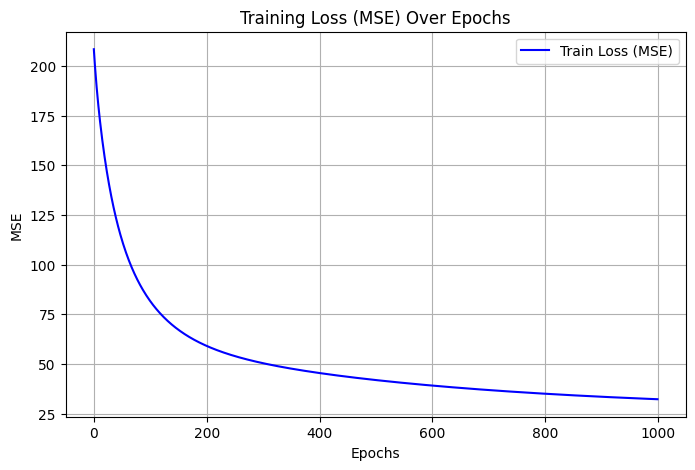

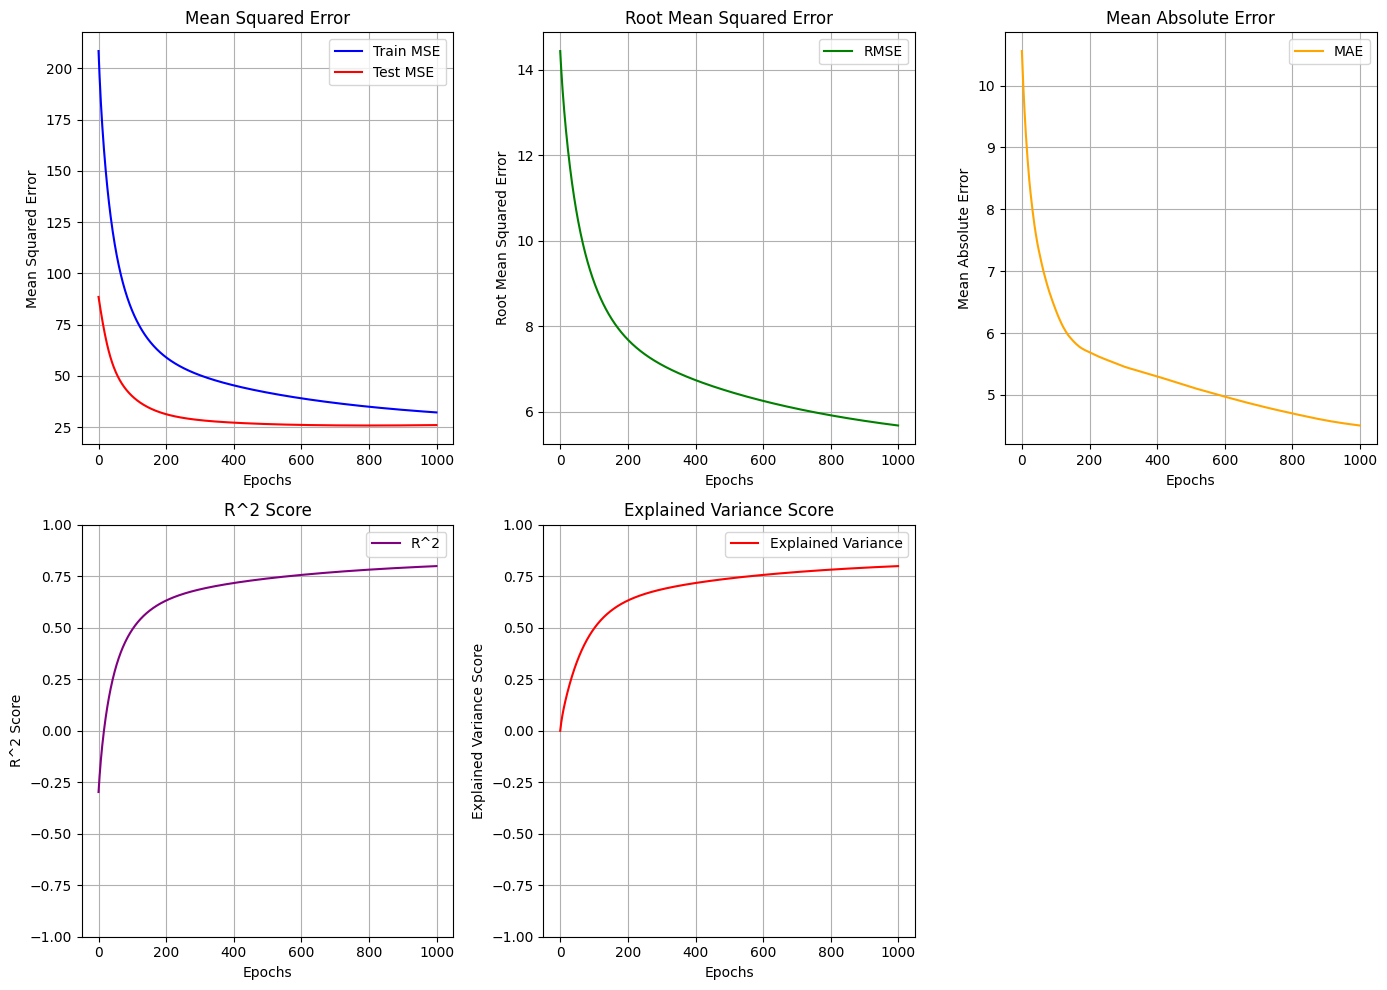

In [237]:
x_5d = scaler.fit_transform(np.column_stack((x , x**2,x**3,x**4,x**5)))
x_train,x_test,y_train,y_test=train_test_split(x_5d,y,random_state=13,test_size=0.2)
model = LinearRegression()
model.train(x_train, y_train,x_test,y_test, epochs=1000, learning_rate=0.01)
model.plot_training()
model.plot_metrics()

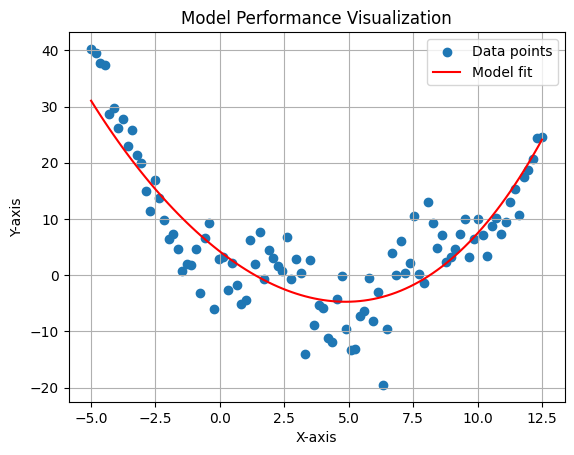

In [238]:
x_line = np.linspace(-5,12.5, 100).reshape(-1,1)
x_line_5d = scaler.fit_transform(np.column_stack((x_line , x_line**2,x_line**3,x_line**4,x_line**5)))
y_line = model.predict(x_line_5d)
plt.scatter(x, y, label='Data points')
plt.plot(x_line, y_line, color='red', label='Model fit')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Model Performance Visualization')
plt.legend()
plt.grid()
plt.show()

2-2 (in report)

2-3

2-4/2-5

In [14]:
model = LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=13,test_size=0.2)
train_input_number = np.linspace(1,len(x_train),len(x_train))
x_train = x_train.reshape(-1, 1)  
x_test = x_test.reshape(-1, 1)
acc_list = []
mse_list = []
rmse_list = []
mae_list = []
r2_list = []
exvar_list = []

for number in train_input_number:
    model.train(x_train, y_train, x_test, y_test, epochs=100, learning_rate=0.001)
    y_pred = model.predict(x_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    explained_variance = explained_variance_score(y_test, y_pred)

    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(r2)
    exvar_list.append(explained_variance)   

Epoch 0: Train MSE = 208.4650, Test MSE = 89.6421, RMSE = 14.4383, MAE = 10.5574, R^2 = -0.2974, Explained Variance = 0.0000

____________________________________________
Trianning Done! (Epoch 99):

Train MSE = 193.4442
Test MSE = 83.8537
RMSE = 13.9084
MAE = 9.9760
R^2 = -0.2039
Explained Variance = -0.0304
____________________________________________

Epoch 0: Train MSE = 193.9085, Test MSE = 82.0027, RMSE = 13.9251, MAE = 10.1304, R^2 = -0.2068, Explained Variance = 0.0000

____________________________________________
Trianning Done! (Epoch 99):

Train MSE = 183.4416
Test MSE = 78.0725
RMSE = 13.5441
MAE = 9.7884
R^2 = -0.1416
Explained Variance = -0.0083
____________________________________________

Epoch 0: Train MSE = 183.3821, Test MSE = 77.3804, RMSE = 13.5419, MAE = 9.8232, R^2 = -0.1413, Explained Variance = 0.0000

____________________________________________
Trianning Done! (Epoch 99):

Train MSE = 175.8030
Test MSE = 74.0554
RMSE = 13.2591
MAE = 9.6887
R^2 = -0.0941
Expla

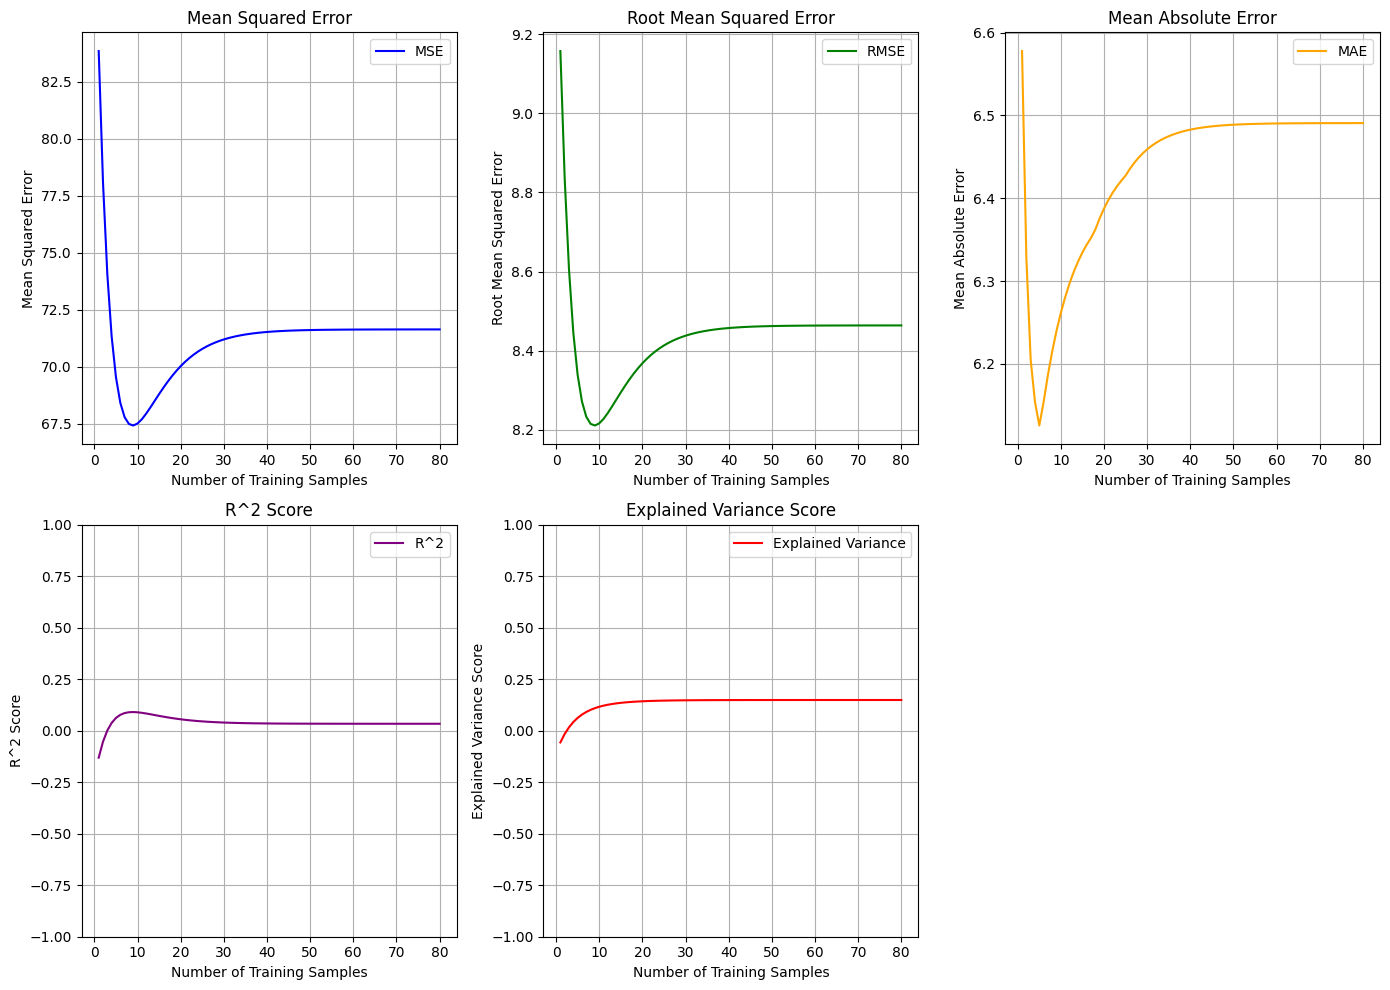

In [15]:
# Plotting the metrics
plt.figure(figsize=(14, 10))

# Mean Squared Error
plt.subplot(2, 3, 1)
plt.plot(train_input_number, mse_list, label='MSE', color='blue')
plt.title('Mean Squared Error')
plt.xlabel('Number of Training Samples')
plt.ylabel('Mean Squared Error')
plt.grid()
plt.legend()

# Root Mean Squared Error
plt.subplot(2, 3, 2)
plt.plot(train_input_number, rmse_list, label='RMSE', color='green')
plt.title('Root Mean Squared Error')
plt.xlabel('Number of Training Samples')
plt.ylabel('Root Mean Squared Error')
plt.grid()
plt.legend()

# Mean Absolute Error
plt.subplot(2, 3, 3)
plt.plot(train_input_number, mae_list, label='MAE', color='orange')
plt.title('Mean Absolute Error')
plt.xlabel('Number of Training Samples')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.legend()

# R^2 Score
plt.subplot(2, 3, 4)
plt.plot(train_input_number, r2_list, label='R^2', color='purple')
plt.title('R^2 Score')
plt.xlabel('Number of Training Samples')
plt.ylabel('R^2 Score')
plt.ylim(-1, 1)  # Set limits for R^2
plt.grid()
plt.legend()

# Explained Variance Score
plt.subplot(2, 3, 5)
plt.plot(train_input_number, exvar_list, label='Explained Variance', color='red')
plt.title('Explained Variance Score')
plt.xlabel('Number of Training Samples')
plt.ylabel('Explained Variance Score')
plt.ylim(-1, 1)  # Set limits for Explained Variance
plt.grid()
plt.legend()


plt.tight_layout()
plt.show()

2-6

In [239]:
from sklearn.linear_model import LinearRegression

Mse (Power 1):72.95233617813358
Mse (Power 2):29.253364430331487
Mse (Power 3):32.71785832071315
Mse (Power 4):30.0830061691722
Mse (Power 5):29.52006523037814
Mse (Power 6):28.929195422803758
Mse (Power 7):21.530862390410334
Mse (Power 8):21.200823758037963


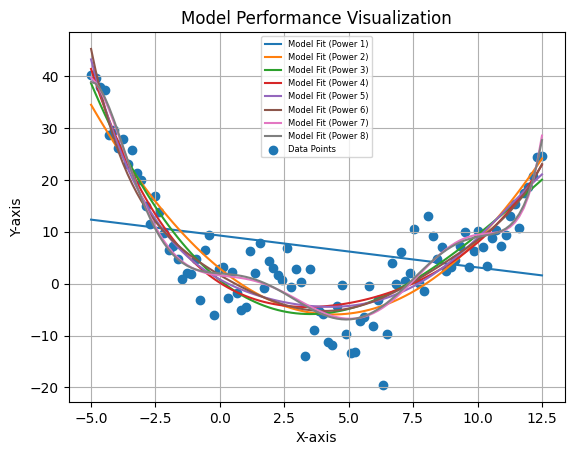

In [240]:
#Previous scikit-learn code
maximum_power = [1, 2, 3, 4, 5, 6, 7, 8]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=13,test_size=0.2)

for power in maximum_power:
    # Create the n-dimensional input
    x_train_n = np.column_stack([np.array(x_train) ** i for i in range(1, power + 1)])
    x_test_n = np.column_stack([np.array(x_test) ** i for i in range(1, power + 1)])

    model = LinearRegression()
    model.fit(x_train_n, y_train)
    y_pred = model.predict(x_test_n)
    xplt = np.linspace(-5,12.5,100)
    xplt_n = np.column_stack([xplt ** int(i) for i in range(1, power + 1)])
    yplt = model.predict(xplt_n)
    mse = mean_squared_error(y_test, y_pred)
    print (f'Mse (Power {power}):{mse}')
    plt.plot(xplt, yplt, label=f'Model Fit (Power {power})')

plt.scatter(x, y, label='Data Points')    
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Model Performance Visualization')
plt.legend(loc=9, prop={'size': 6})
plt.grid()
plt.show()
    
   

2-7

In [241]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [242]:
x = np.linspace(-5, 12.5, 100).reshape(-1, 1)
y=y.reshape(-1, 1)

Train MSE: 10.0032, Train R²: 93.7745 %
Test MSE: 15.1894, Test R²: 79.5186
Explained Variance Score train : 0.938
Explained Variance Score test : 0.795


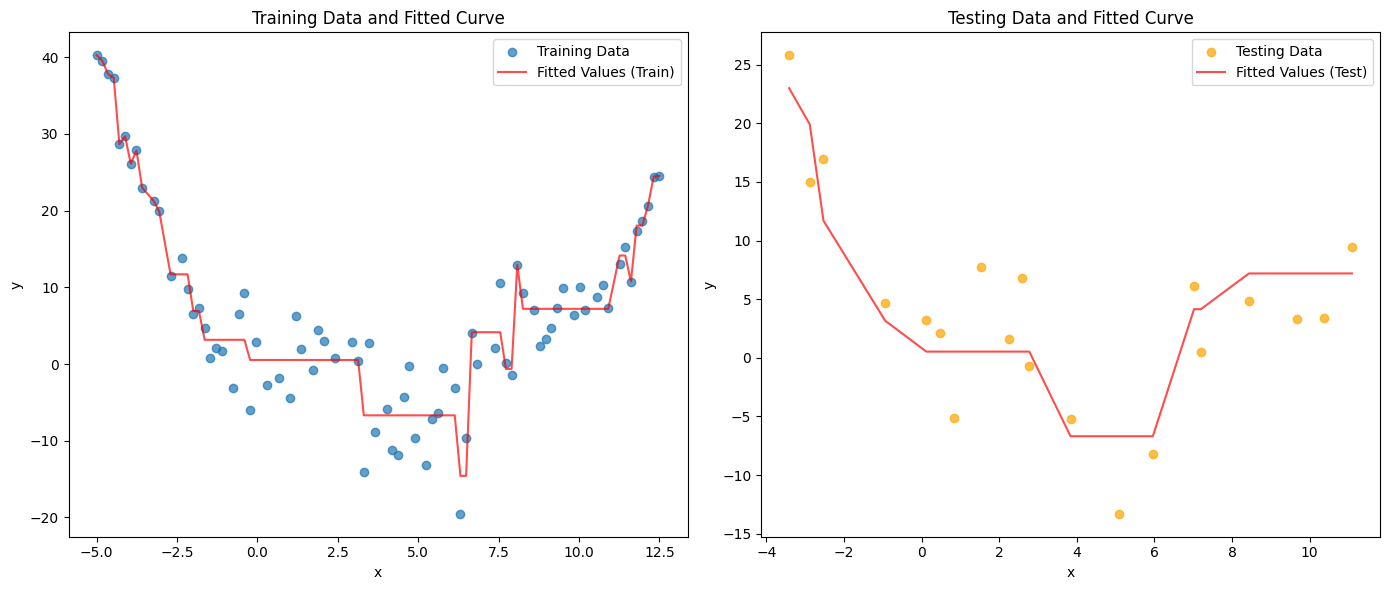

In [243]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

# Train Decision Tree Regressor
tree_model = DecisionTreeRegressor(max_depth=5)  # Adjust depth for regularization
tree_model.fit(x_train, y_train)

# Predict on training and testing data
y_train_pred = tree_model.predict(x_train)
y_test_pred = tree_model.predict(x_test)

# Compute Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Compute R^2 (accuracy) for training and testing data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

evs_train = explained_variance_score(y_train, y_train_pred)
evs_test = explained_variance_score(y_test, y_test_pred)

# Print results
print(f"Train MSE: {mse_train:.4f}, Train R²: {r2_train*100:.4f} %")
print(f"Test MSE: {mse_test:.4f}, Test R²: {r2_test*100:.4f}")
print(f"Explained Variance Score train : {evs_train:.3f}")
print(f"Explained Variance Score test : {evs_test:.3f}")

# Plot results
plt.figure(figsize=(14, 6))

# Subplot 1: Training data and fitted curve
plt.subplot(1, 2, 1)
plt.scatter(x_train, y_train, label="Training Data", alpha=0.7)
plt.plot(np.sort(x_train[:, 0]),
         tree_model.predict(x_train[np.argsort(x_train[:, 0])]), color="red", label="Fitted Values (Train)", alpha=0.7)
plt.title("Training Data and Fitted Curve")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Subplot 2: Testing data and fitted curve
plt.subplot(1, 2, 2)
plt.scatter(x_test, y_test, label="Testing Data", alpha=0.7, color="orange")
plt.plot(np.sort(x_test[:, 0]), tree_model.predict(x_test[np.argsort(x_test[:, 0])]), color="red", label="Fitted Values (Test)", alpha=0.7)
plt.title("Testing Data and Fitted Curve")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.tight_layout()
plt.show()

Train MSE: 4.7489, Train R²: 97.0445 %
Test MSE: 14.9912, Test R²: 79.7858
Explained Variance Score train : 0.970
Explained Variance Score test : 0.799


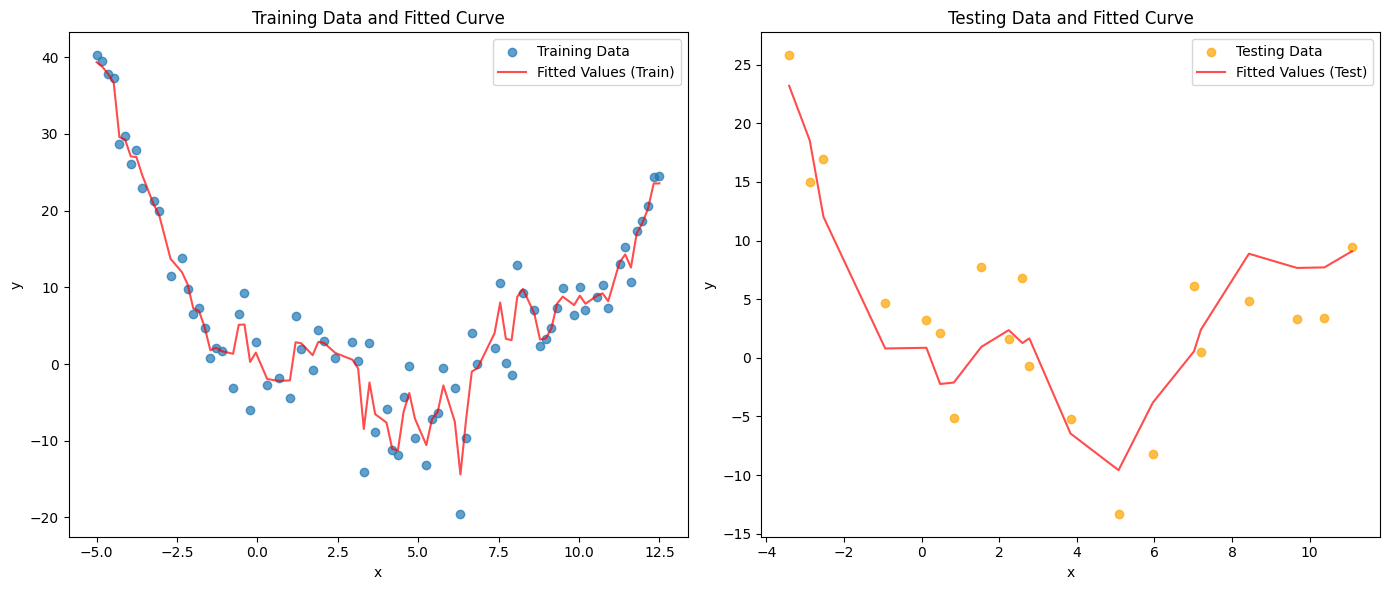

In [244]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

# Train Random Forest Regressor
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(x_train, y_train.ravel())

# Predict on training and testing data
y_train_pred = forest_model.predict(x_train)
y_test_pred = forest_model.predict(x_test)

# Compute Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Compute R^2 (accuracy) for training and testing data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

evs_train = explained_variance_score(y_train, y_train_pred)
evs_test = explained_variance_score(y_test, y_test_pred)

# Print results
print(f"Train MSE: {mse_train:.4f}, Train R²: {r2_train*100:.4f} %")
print(f"Test MSE: {mse_test:.4f}, Test R²: {r2_test*100:.4f}")
print(f"Explained Variance Score train : {evs_train:.3f}")
print(f"Explained Variance Score test : {evs_test:.3f}")

# Plot results
plt.figure(figsize=(14, 6))

# Subplot 1: Training data and fitted curve
plt.subplot(1, 2, 1)
plt.scatter(x_train, y_train, label="Training Data", alpha=0.7)
plt.plot(np.sort(x_train[:, 0]), forest_model.predict(x_train[np.argsort(x_train[:, 0])]), color="red", label="Fitted Values (Train)", alpha=0.7)
plt.title("Training Data and Fitted Curve")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Subplot 2: Testing data and fitted curve
plt.subplot(1, 2, 2)
plt.scatter(x_test, y_test, label="Testing Data", alpha=0.7, color="orange")
plt.plot(np.sort(x_test[:, 0]), forest_model.predict(x_test[np.argsort(x_test[:, 0])]), color="red", label="Fitted Values (Test)", alpha=0.7)
plt.title("Testing Data and Fitted Curve")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.tight_layout()
plt.show()

Train MSE: 17.8641, Train R²: 87.8743 %
Test MSE: 14.1150, Test R²: 89.5128
Explained Variance Score train : 0.881
Explained Variance Score test : 0.931


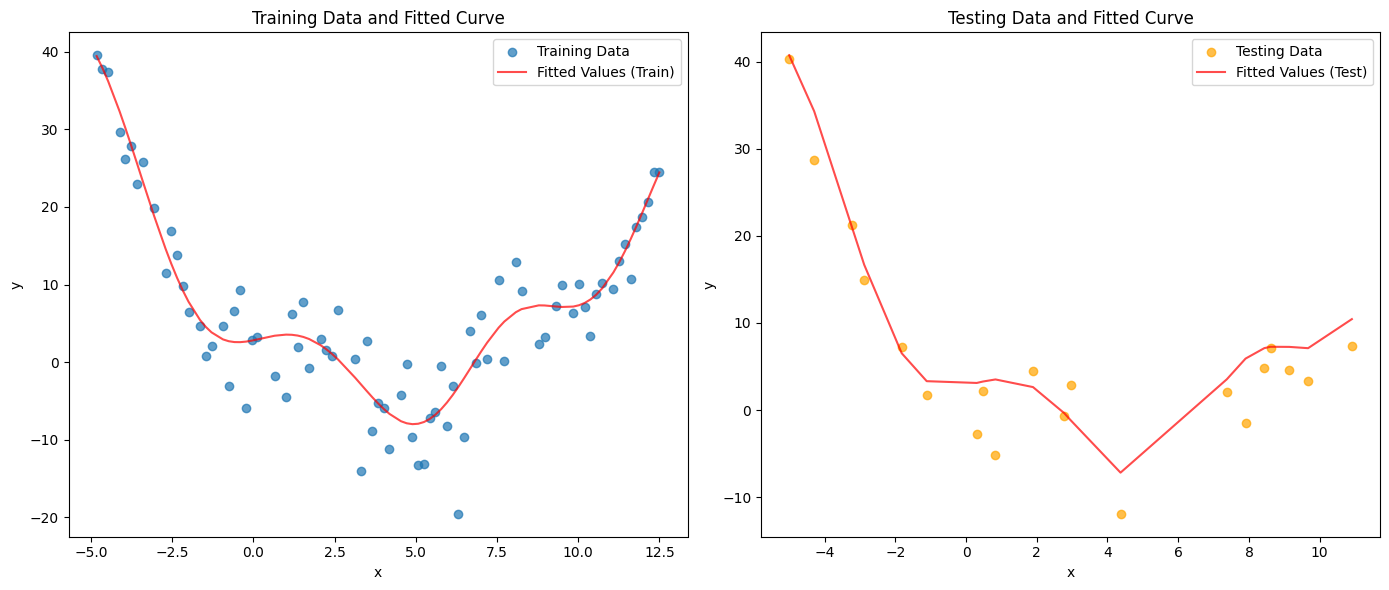

In [245]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train Support Vector Regressor
svr_model = SVR(kernel="rbf", C=100, gamma=0.1)
svr_model.fit(x_train, y_train.ravel())

# Predict on training and testing data
y_train_pred = svr_model.predict(x_train)
y_test_pred = svr_model.predict(x_test)

# Compute Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Compute R^2 (accuracy) for training and testing data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

evs_train = explained_variance_score(y_train, y_train_pred)
evs_test = explained_variance_score(y_test, y_test_pred)

# Print results
print(f"Train MSE: {mse_train:.4f}, Train R²: {r2_train*100:.4f} %")
print(f"Test MSE: {mse_test:.4f}, Test R²: {r2_test*100:.4f}")
print(f"Explained Variance Score train : {evs_train:.3f}")
print(f"Explained Variance Score test : {evs_test:.3f}")
# Plot results
plt.figure(figsize=(14, 6))

# Subplot 1: Training data and fitted curve
plt.subplot(1, 2, 1)
plt.scatter(x_train, y_train, label="Training Data", alpha=0.7)
plt.plot(np.sort(x_train[:, 0]), svr_model.predict(x_train[np.argsort(x_train[:, 0])]), color="red", label="Fitted Values (Train)", alpha=0.7)
plt.title("Training Data and Fitted Curve")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Subplot 2: Testing data and fitted curve
plt.subplot(1, 2, 2)
plt.scatter(x_test, y_test, label="Testing Data", alpha=0.7, color="orange")
plt.plot(np.sort(x_test[:, 0]), svr_model.predict(x_test[np.argsort(x_test[:, 0])]), color="red", label="Fitted Values (Test)", alpha=0.7)
plt.title("Testing Data and Fitted Curve")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.tight_layout()
plt.show()

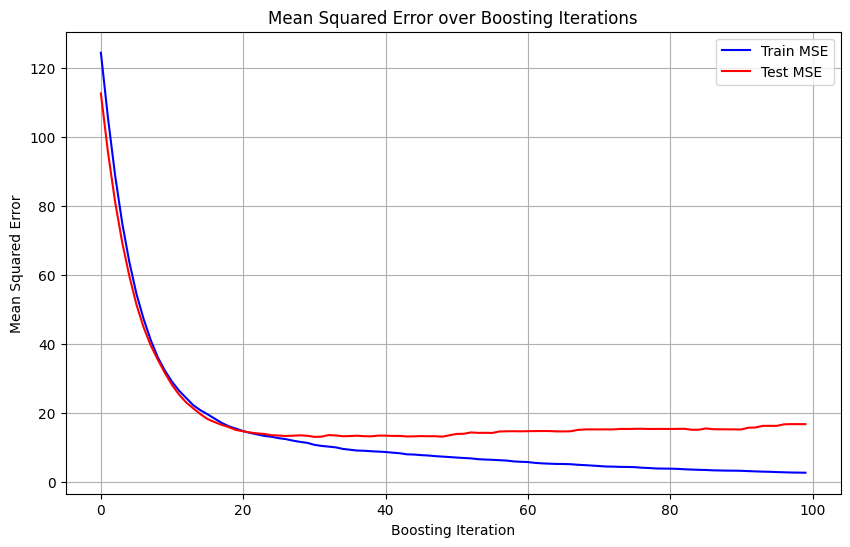

Train MSE: 2.5680, Train R²: 98.2569 %
Test MSE: 16.6759, Test R²: 87.6101
Explained Variance Score train : 0.983
Explained Variance Score test : 0.898


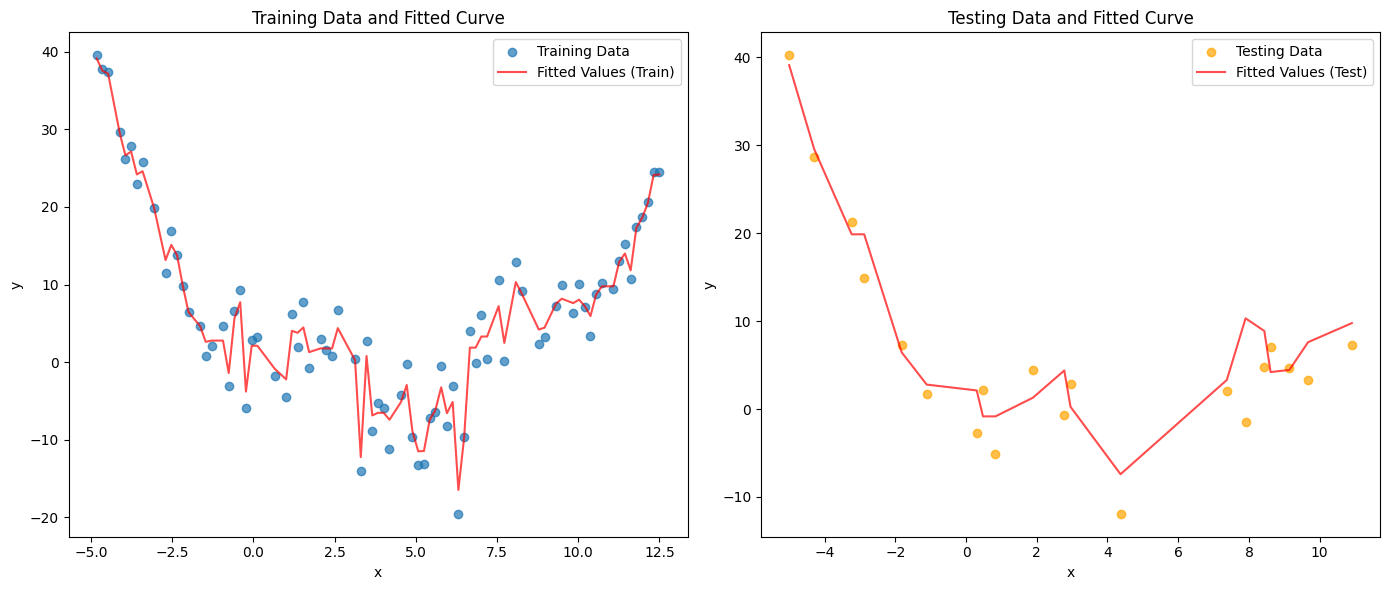

In [246]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(x_train, y_train.ravel())

# Track errors during training
train_errors = []
test_errors = []

# Iterate over the staged predictions (after each boosting iteration)
for y_train_pred, y_test_pred in zip(gbr_model.staged_predict(x_train), gbr_model.staged_predict(x_test)):
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Plot the training and testing errors over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(gbr_model.n_estimators), train_errors, label='Train MSE', color='blue')
plt.plot(range(gbr_model.n_estimators), test_errors, label='Test MSE', color='red')
plt.title('Mean Squared Error over Boosting Iterations')
plt.xlabel('Boosting Iteration')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

# Predict on final model (after all iterations)
y_train_pred = gbr_model.predict(x_train)
y_test_pred = gbr_model.predict(x_test)

# Compute Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Compute R^2 (accuracy) for training and testing data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

evs_train = explained_variance_score(y_train, y_train_pred)
evs_test = explained_variance_score(y_test, y_test_pred)

# Print results
print(f"Train MSE: {mse_train:.4f}, Train R²: {r2_train*100:.4f} %")
print(f"Test MSE: {mse_test:.4f}, Test R²: {r2_test*100:.4f}")
print(f"Explained Variance Score train : {evs_train:.3f}")
print(f"Explained Variance Score test : {evs_test:.3f}")

# Plot results
plt.figure(figsize=(14, 6))

# Subplot 1: Training data and fitted curve
plt.subplot(1, 2, 1)
plt.scatter(x_train, y_train, label="Training Data", alpha=0.7)
plt.plot(np.sort(x_train[:, 0]), gbr_model.predict(x_train[np.argsort(x_train[:, 0])]), color="red", label="Fitted Values (Train)", alpha=0.7)
plt.title("Training Data and Fitted Curve")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Subplot 2: Testing data and fitted curve
plt.subplot(1, 2, 2)
plt.scatter(x_test, y_test, label="Testing Data", alpha=0.7, color="orange")
plt.plot(np.sort(x_test[:, 0]), gbr_model.predict(x_test[np.argsort(x_test[:, 0])]), color="red", label="Fitted Values (Test)", alpha=0.7)
plt.title("Testing Data and Fitted Curve")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.tight_layout()
plt.show()